# Test plots for N =75 run

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xarray as xr
from xgcm import Grid
import dask 
import dask.distributed
%matplotlib inline

In [2]:
from dask.distributed import Client
from dask.distributed import LocalCluster
cluster = LocalCluster()
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:44335 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 16 Memory: 406.01 GB


$\Large \text{Stats time series}$

In [3]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/PEM_ACC/N_75/Z_star/"
#ds_stat = xr.open_dataset(ppdir+"ocean.stats.nc")
ds_stat = xr.open_mfdataset(ppdir+"ocean.stats*.nc")
ds_stat

/home/Hemant.Khatri/anaconda3/envs/analysis_python3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  This is separate from the ipykernel package so we can avoid doing imports until
/home/Hemant.Khatri/anaconda3/envs/analysis_python3/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).


<xarray.Dataset>
Dimensions:        (Interface: 76, Layer: 75, Time: 1462)
Coordinates:
  * Interface      (Interface) float64 0.0 1.0 3.787 ... 3.898e+03 4e+03
  * Layer          (Layer) float64 0.5 2.393 6.02 ... 3.848e+03 3.949e+03
  * Time           (Time) timedelta64[ns] 0 days 10 days ... 14600 days
Data variables:
    Ntrunc         (Time) float64 dask.array<chunksize=(731,), meta=np.ndarray>
    En             (Time) float64 dask.array<chunksize=(731,), meta=np.ndarray>
    APE            (Time, Interface) float64 dask.array<chunksize=(731, 76), meta=np.ndarray>
    KE             (Time, Layer) float64 dask.array<chunksize=(731, 75), meta=np.ndarray>
    H0             (Time, Interface) float64 dask.array<chunksize=(731, 76), meta=np.ndarray>
    Mass_lay       (Time, Layer) float64 dask.array<chunksize=(731, 75), meta=np.ndarray>
    Mass           (Time) float64 dask.array<chunksize=(731,), meta=np.ndarray>
    Mass_chg       (Time) float64 dask.array<chunksize=(731,), meta=n

Text(0, 0.5, 'Available Potential Energy (J)')

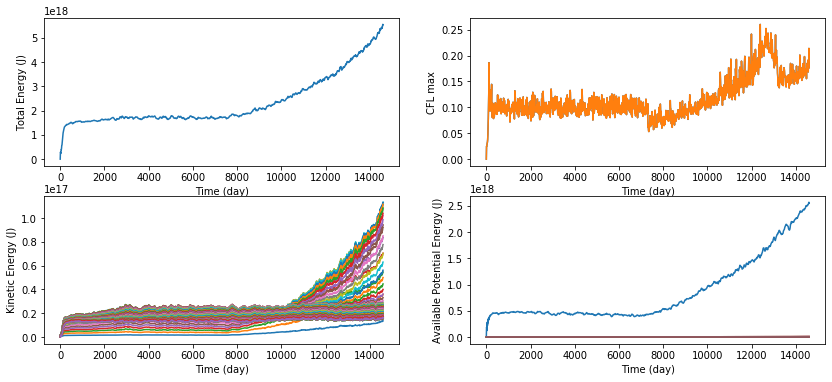

In [4]:
plt.figure(figsize=(14,6))

plt.subplot(2,2,1)
plt.plot(ds_stat['Time']/(24*3600*1e9), ds_stat['En'])
plt.xlabel('Time (day)')
plt.ylabel('Total Energy (J)')

plt.subplot(2,2,2)
plt.plot(ds_stat['Time']/(1e9*3600*24), ds_stat['max_CFL_trans'])
plt.plot(ds_stat['Time']/(1e9*3600*24), ds_stat['max_CFL_lin'])
plt.xlabel('Time (day)')
plt.ylabel('CFL max')

plt.subplot(2,2,3)
plt.plot(ds_stat['Time']/(24*3600*1e9), ds_stat['KE'])
plt.xlabel('Time (day)')
plt.ylabel('Kinetic Energy (J)')

plt.subplot(2,2,4)
plt.plot(ds_stat['Time']/(24*3600*1e9), ds_stat['APE'])
plt.xlabel('Time (day)')
plt.ylabel('Available Potential Energy (J)')

$\Large \text{Snapshots and other diagnostics}$

In [5]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/PEM_ACC/N_75/Z_star/"

#ds = xr.open_dataset(ppdir+"prog.nc",chunks={'Time': 1}, decode_times=False)
ds = xr.open_mfdataset(ppdir+"prog_h*.nc",chunks={'Time': 1}, decode_times=False)
dsgrid = xr.open_dataset(ppdir+"grid.nc", decode_times=False)
dsgrid = dsgrid.drop('Time')
ds = xr.merge([ds, dsgrid])

#ds_z = xr.open_dataset(ppdir+"prog_z.nc",chunks={'Time': 1}, decode_times=False)
ds_z = xr.open_mfdataset(ppdir+"prog_z*.nc",chunks={'Time': 1}, decode_times=False)
ds_z = xr.merge([ds_z, dsgrid])

/home/Hemant.Khatri/anaconda3/envs/analysis_python3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  after removing the cwd from sys.path.
/home/Hemant.Khatri/anaconda3/envs/analysis_python3/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,
/home/Hemant.Khatri/

In [6]:
print(ds_z)
print(ds)

<xarray.Dataset>
Dimensions:      (Time: 40, xh: 320, xq: 320, yh: 272, yq: 272, z_i: 31, z_l: 30)
Coordinates:
  * xq           (xq) float64 0.25 0.5 0.75 1.0 1.25 ... 79.25 79.5 79.75 80.0
  * z_i          (z_i) float64 0.0 5.0 15.0 25.0 ... 3.25e+03 3.75e+03 4.25e+03
  * yh           (yh) float64 -69.94 -69.85 -69.77 ... -30.46 -30.24 -30.02
  * z_l          (z_l) float64 2.5 10.0 20.0 32.5 ... 3e+03 3.5e+03 4e+03
  * yq           (yq) float64 -69.89 -69.81 -69.72 ... -30.35 -30.13 -29.92
  * xh           (xh) float64 0.125 0.375 0.625 0.875 ... 79.38 79.62 79.88
  * Time         (Time) float64 365.0 730.0 1.095e+03 ... 1.424e+04 1.46e+04
Data variables:
    temp         (Time, z_l, yh, xh) float32 dask.array<chunksize=(1, 30, 272, 320), meta=np.ndarray>
    salt         (Time, z_l, yh, xh) float32 dask.array<chunksize=(1, 30, 272, 320), meta=np.ndarray>
    u            (Time, z_l, yh, xq) float32 dask.array<chunksize=(1, 30, 272, 320), meta=np.ndarray>
    v            (Time, z_l,

In [9]:
grid = Grid(ds, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'},
                        'Z': {'center': 'zl', 'outer': 'zi'} }, periodic=['X']);


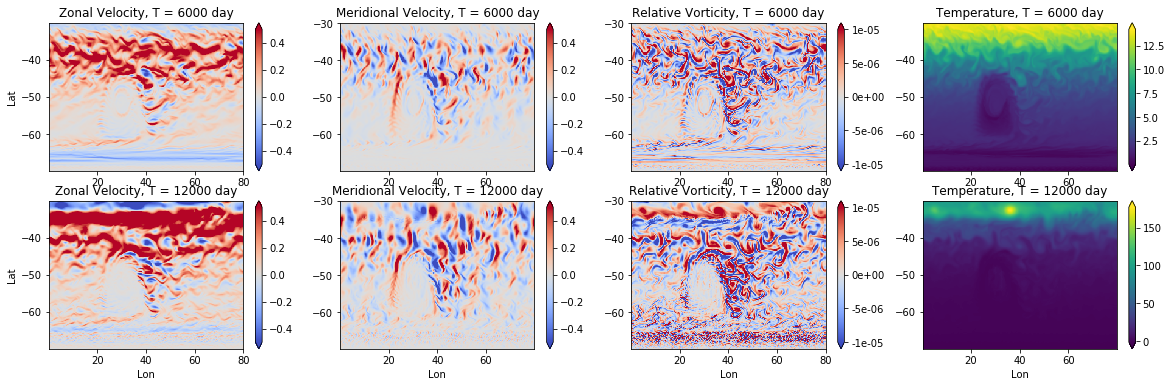

In [7]:
plt.figure(figsize=(20,6))

ct = 0
for i in range(100,221,100):
    plt.subplot(2,4,4*ct + 1)
    tmp = ds['u'].isel(Time = i, zl=10)
    plt.pcolor(ds['xq'], ds['yh'], tmp, vmin = -0.5, vmax = 0.5, cmap='coolwarm')
    plt.colorbar(extend='both')
    plt.ylabel('Lat')
    if(ct>0):
        plt.xlabel('Lon')
    plt.title('Zonal Velocity, T = ' + str(i*60) + ' day')
    
    plt.subplot(2,4,4*ct + 2)
    tmp = ds['v'].isel(Time = i, zl=10)
    plt.pcolor(ds['xh'], ds['yq'], tmp, vmin = -0.5, vmax = 0.5, cmap='coolwarm')
    plt.colorbar(extend='both')
    if(ct>0):
        plt.xlabel('Lon')
    plt.title('Meridional Velocity, T = ' + str(i*60) + ' day')
    
    plt.subplot(2,4,4*ct + 3)
    tmp = ds['RV'].isel(Time = i, zl=10)
    plt.pcolor(ds['xq'], ds['yq'], tmp, vmin = -1e-5, vmax = 1e-5, cmap='coolwarm')
    plt.colorbar(format='%.0e', extend='both')
    if(ct>0):
        plt.xlabel('Lon')
    plt.title('Relative Vorticity, T = ' + str(i*60) + ' day')
    
    plt.subplot(2,4,4*ct + 4)
    tmp = ds['temp'].isel(Time = i, zl=10)
    plt.pcolor(ds['xh'], ds['yh'], tmp)
    plt.colorbar(extend='both')
    if(ct>0):
        plt.xlabel('Lon')
    plt.title('Temperature, T = ' + str(i*60) + ' day')
    
    ct = ct + 1

In [10]:
z = grid.interp(ds['e'],'Z', boundary='fill')
z

<xarray.DataArray 'mul-96e3805db60cced194682c8481dd3a4c' (Time: 242, zl: 75, yh: 272, xh: 320)>
dask.array<mul, shape=(242, 75, 272, 320), dtype=float32, chunksize=(1, 75, 272, 320), chunktype=numpy.ndarray>
Coordinates:
  * Time     (Time) float64 60.0 120.0 180.0 ... 1.444e+04 1.45e+04 1.456e+04
  * zl       (zl) float64 0.5 2.393 6.02 11.3 ... 3.748e+03 3.848e+03 3.949e+03
  * yh       (yh) float64 -69.94 -69.85 -69.77 -69.68 ... -30.46 -30.24 -30.02
  * xh       (xh) float64 0.125 0.375 0.625 0.875 ... 79.12 79.38 79.62 79.88

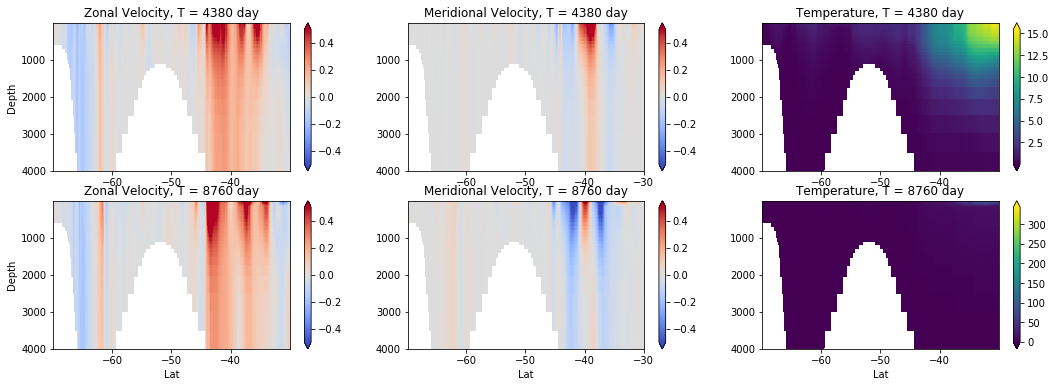

In [11]:
plt.figure(figsize=(18,6))

ct = 0
for i in range(12,30,12):
    plt.subplot(2,3,3*ct + 1)
    tmp = ds_z['u'].isel(Time = i, xq=120)
    plt.pcolor(ds_z['yh'], ds_z['z_l'], tmp, vmin = -0.5, vmax = 0.5, cmap='coolwarm')
    plt.colorbar(extend='both')
    plt.ylabel('Depth')
    if(ct>0):
        plt.xlabel('Lat')
    plt.title('Zonal Velocity, T = ' + str(i*365) + ' day')
    plt.gca().invert_yaxis()
    
    plt.subplot(2,3,3*ct + 2)
    tmp = ds_z['v'].isel(Time = i, xh=120)
    plt.pcolor(ds_z['yq'], ds_z['z_l'], tmp, vmin = -0.5, vmax = 0.5, cmap='coolwarm')
    plt.colorbar(extend='both')
    if(ct>0):
        plt.xlabel('Lat')
    plt.title('Meridional Velocity, T = ' + str(i*365) + ' day')
    plt.gca().invert_yaxis()
    
    plt.subplot(2,3,3*ct + 3)
    tmp = ds_z['temp'].isel(Time = i, xh=120)
    plt.pcolor(ds_z['yh'], ds_z['z_l'], tmp)
    plt.colorbar(extend='both')
    if(ct>0):
        plt.xlabel('Lat')
    plt.title('Temperature, T = ' + str(i*365) + ' day')
    plt.gca().invert_yaxis()
    
    ct = ct + 1

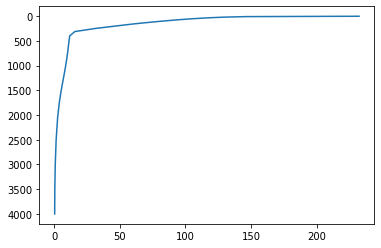

In [13]:
t = ds_z['temp'].isel(Time= 30,yh=270).mean('xh').transpose()
plt.plot(t, t.z_l )
plt.gca().invert_yaxis()

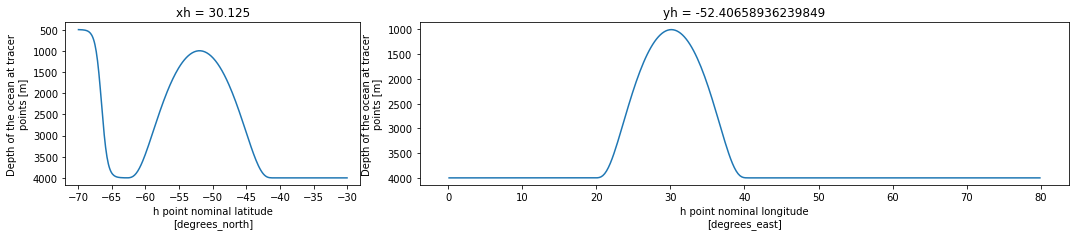

In [14]:
plt.figure(figsize=(18,3))

plt.subplot(1,3,1)
ds['depth_ocean'].isel(xh=120).plot()
plt.gca().invert_yaxis()

plt.subplot(1,3,(2,3))
ds['depth_ocean'].isel(yh=150).plot()
plt.gca().invert_yaxis()

In [15]:
dh = - grid.diff(ds['e'], 'Z', boundary='fill')
T_mean = ds['temp'] * dh
T_mean = (T_mean * ds.dxt * ds.dyt).sum(dim=['xh', 'yh', 'zl']) / (dh * ds.dxt * ds.dyt).sum(dim=['xh', 'yh', 'zl'])

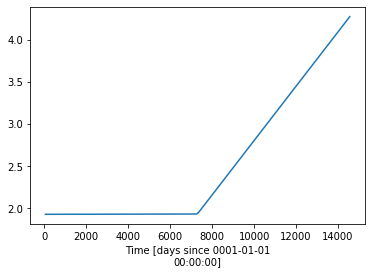

In [16]:
T_mean.plot()

In [17]:
ds.close()
ds_z.close()
client.close()
cluster.close()